**I will be comparing the differences between night and day activity across genotypes.**

In [189]:
# Our numerical workhorses
import numpy as np
import pandas as pd

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Seaborn, useful for graphics
import seaborn as sns

import beeswarm as bs
# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables high res graphics inline 
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

def pretty_activity_plot(ax, selector, selection, col, df, xlabel='time (hr)', 
                         ylabel='activity (sec / min)', lw=0.25, 
                         color=None):
    """
    Makes a pretty plot of sleep traces.  Generates the plot on axes ax,
    and then returns the updated ax.
    """
    # Make sure selection input is iterable
    if type(selection) in [str, int, float]:
        selection = [selection]
        
    # Plot time traces of column col for each fish
    for sel in selection:
        # Pull out record of interest
        df_plot = df[df[selector]==sel]

        # Generate plot
        if color is None:
            ax.plot(df_plot.zeit, df_plot[col], '-', lw=lw)
        else:
            ax.plot(df_plot.zeit, df_plot[col], '-', lw=lw, color=color)

    # Label axes
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Set axis limits
    ax.set_xlim((df_plot.zeit.min(), df_plot.zeit.max()))
    ax.set_ylim((0.0, ax.get_ylim()[1]))
    
    # Overlay night shading
    ax.fill_between(df_plot.zeit, 0.0, ax.get_ylim()[1], 
                    where=~df_plot.light, color='gray', alpha=0.3, zorder=0)    
    
    return ax

Lets read in the tidy dataset.

In [2]:
df = pd.read_csv("130315_1_minute_intervals.csv",comment="#")

In [7]:
df.head()

,fish,genotype,day,light,CLOCK,zeit,activity,window
0,FISH1,het,0,True,9.519,9.519,0.6,NaN
1,FISH1,het,0,True,9.536,9.536,1.9,NaN
2,FISH1,het,0,True,9.553,9.553,1.9,NaN
3,FISH1,het,0,True,9.569,9.569,13.4,NaN
4,FISH1,het,0,True,9.586,9.586,15.4,NaN


For this analysis, lets get individual data points for each fish and take the mean in order to compare it to the mean activity during the night, across all genotypes.

In [195]:
#First and Third days are based on the dataframe indexing. Day[1] in dataframe is the first day.
SecondDayActivity = df [(df["day"]==1) & (df["light"]==True) ].groupby(("fish","genotype"))["activity"].mean().reset_index()
FourthDayActivity = df [(df["day"]==3) & (df["light"]==True) ].groupby(("fish","genotype"))["activity"].mean().reset_index()

#This is different from the Tutorial. First and Third Nights are the ones that follow the first and third days, respectively.
SecondNightActivity = df[(df["day"]==1) & (df["light"]==False) ].groupby(("fish","genotype"))["activity"].mean().reset_index()
FourthNightActivity = df[(df["day"]==3) & (df["light"]==False) ].groupby(("fish","genotype"))["activity"].mean().reset_index()


In [180]:
CombinedSleepData =pd.concat([SecondDayActivity[["fish","genotype","activity"]],SecondNightActivity[["activity"]],FourthDayActivity[["activity"]],FourthNightActivity[["activity"]]], axis=1)

In [181]:
CombinedSleepData.columns=["fish","genotype","MeanSecondDayActivity","MeanSecondNightActivity","MeanFourthDayActivity","MeanFourthNightActivity"]

In [182]:
CombinedSleepData.groupby("genotype").mean()

,MeanSecondDayActivity,MeanSecondNightActivity,MeanFourthDayActivity,MeanFourthNightActivity
genotype,,,,
het,4.453268,0.900623,6.699870,1.305324
mut,3.882942,2.405909,6.467198,2.841098
wt,4.989648,0.951853,6.349120,1.030118


Find ratio of activity (Day/Night)

In [183]:
MeanCombinedSleepData=CombinedSleepData.groupby("genotype").mean().reset_index()

In [185]:
MeanCombinedSleepData["RatioSecondDayNight"]=pd.Series(MeanCombinedSleepData["MeanSecondDayActivity"]/MeanCombinedSleepData["MeanSecondNightActivity"])

MeanCombinedSleepData["RatioFourthDayNight"]=pd.Series(MeanCombinedSleepData["MeanFourthDayActivity"]/MeanCombinedSleepData["MeanFourthNightActivity"])

In [196]:
SecondDayActivity

,fish,genotype,activity
0,FISH1,het,4.075866
1,FISH10,het,2.007527
2,FISH11,mut,3.914576
3,FISH12,mut,3.986141
4,FISH13,mut,3.050538
5,FISH14,wt,5.300836
6,FISH15,het,3.554958
7,FISH18,wt,5.334528
8,FISH19,het,5.214934
9,FISH2,wt,6.136918


In [187]:
CombinedSleepData

,fish,genotype,MeanSecondDayActivity,MeanSecondNightActivity,MeanFourthDayActivity,MeanFourthNightActivity
0,FISH1,het,4.075866,1.209667,3.366148,2.280000
1,FISH10,het,2.007527,0.749000,5.414593,2.170500
2,FISH11,mut,3.914576,2.181167,4.708493,3.393333
3,FISH12,mut,3.986141,1.883500,4.016388,1.971667
4,FISH13,mut,3.050538,1.249500,4.678947,1.978500
5,FISH14,wt,5.300836,0.980333,4.478110,0.763500
6,FISH15,het,3.554958,0.938500,3.773565,1.036500
7,FISH18,wt,5.334528,0.929500,6.795096,1.299000
8,FISH19,het,5.214934,0.723667,3.610167,0.679500
9,FISH2,wt,6.136918,0.542500,5.978947,0.611167


AttributeError: 'DataFrame' object has no attribute 'zeit'

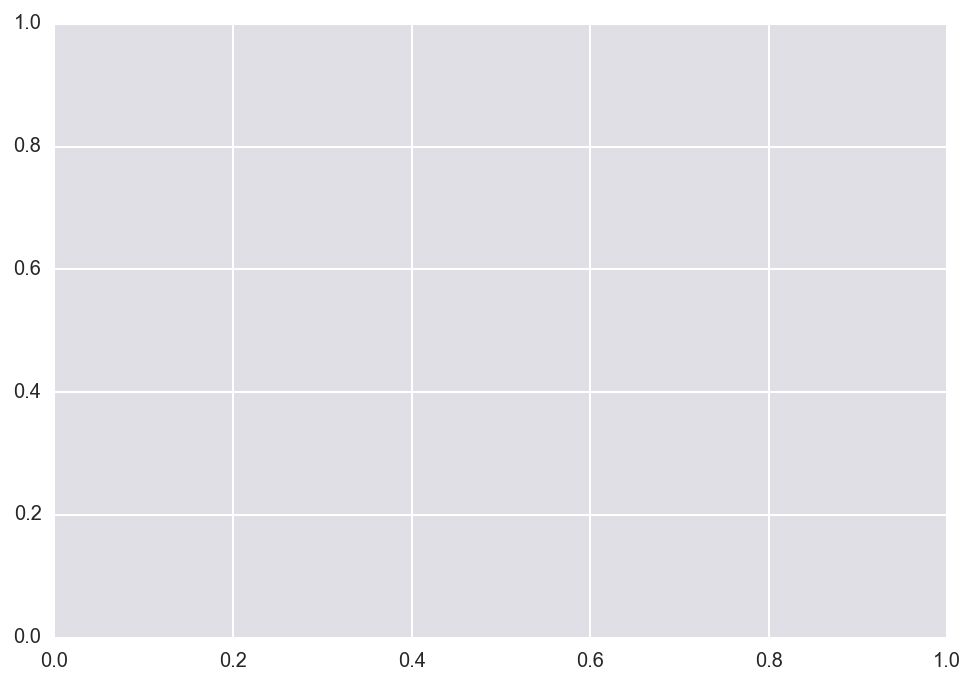

In [192]:
Genotypes = [ "wt","het","mut" ]
with sns.color_palette("Paired"):
    fig, ax = plt.subplots()
    for gtype in Genotypes:
        ax = pretty_activity_plot(ax, "genotype", gtype, "MeanSecondDayActivity",
                                 CombinedSleepData, lw=1)
        plt.legend(("wt","het","mut"), loc = "upper left")

